# 회귀분석의 기본 가정 검증

## 잔차의 정규성 검증 - QQ Plot

실습 참고 링크

https://zephyrus1111.tistory.com/54

먼저 QQ Plot이란, 가로축에선 이론상의 Quantile을 적어두고 세로축에는 획득된 샘플 값의 Quantile을 찍어둔다.
이론과 실제가 얼마나 차이가 나는지를 쉽게 표현하는 plot이다.

즉, 이 plot을 통해 잔차의 분포가 정규분포와 어느정도 차이가 나는지를 확인해 볼 수 있다.

### Example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
 
from scipy.stats import norm
from statsmodels.formula.api import ols
 
df = pd.read_csv('C:/Users/USER/Desktop/TIL_swtak/DataScience/Dataset/toluca_company_dataset.csv')

In [3]:
df

,Lot_size,Work_hours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361
5,60,224
6,120,546
7,80,352
8,100,353
9,50,157


In [4]:
# sm.ols를 활용하여 다음과 같은 방식으로도 구현 가능하다.
# y ~ x변수 같은 방식으로 편하게 지정 가능하다.

fit = ols('Work_hours ~ Lot_size',data = df).fit()

In [6]:
# 다음과 같이 결과표를 출력 가능하다.
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Work_hours   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           4.45e-10
Time:                        23:43:20   Log-Likelihood:                -131.64
No. Observations:                  25   AIC:                             267.3
Df Residuals:                      23   BIC:                             269.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3659     26.177      2.382      0.026       8.214     116.518
Lot_size       3.5702      0.347     10.290      0.000       2.852       4.288
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.684
Skew:                           0.298   Prob(JB):                        0.710
Kurtosis:                       2.450   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# 잔차는 다음을 통해 접근 가능하다.
fit.resid

0      51.017980
1     -48.471919
2     -19.875960
3      -7.684040
4      48.720000
5     -52.577980
6      55.209899
7       4.017980
8     -66.386061
9     -83.875960
10    -45.173939
11    -60.280000
12      5.315960
13    -20.769899
14    -20.088081
15      0.613939
16     42.528081
17     27.124040
18     -6.684040
19    -34.088081
20    103.528081
21     84.315960
22     38.826061
23     -5.982020
24     10.720000
dtype: float64

이제 잔차를 시각화하고 이를 분석하고자 한다.

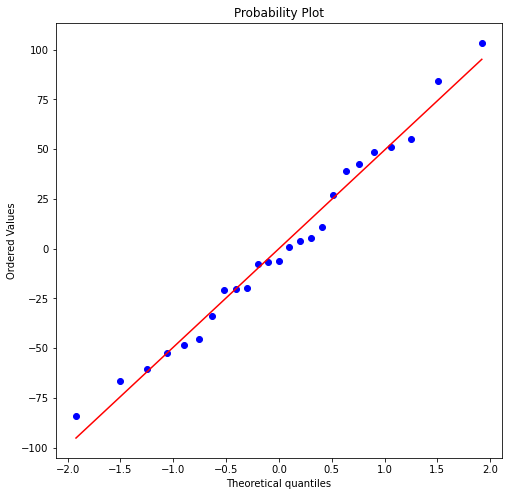

In [8]:
# 쉬운 방법 - probplot
from scipy.stats import probplot

fig = plt.figure(figsize = (8, 8))
fig.set_facecolor('white')

ax = fig.add_subplot()
probplot(fit.resid, dist = 'norm', plot = ax)
plt.show()

통계적으로 정규성을 검증하는 방법 또한 존재한다.

## 잔차의 정규성 검증 : Shapiro Test : 샤피로 윌크 검정

여기서는 특이하게
- 귀무가설 : 데이터는 정규분포를 따른다.
- 대립가설 : 데이터는 정규분포를 따르지 않는다.


따라서 p-value값이 유의수준 이하로 나올 경우 귀무가설이 기각이 되므로 데이터가 정규분포를 따르지 않게 된다.

In [11]:
from scipy.stats import shapiro
shapiro(fit.resid.values)

ShapiroResult(statistic=0.978904128074646, pvalue=0.8625532984733582)

귀무가설을 기각할 수 없으므로 잔차가 정규분포를 따른다고 볼 수 있을 것이다.

## Durbin - Watson 통계량

이는 잔차의 독립성 검증에 확인된다.